# zomato data analysis using python

1) What type of restaurant do the majority of customers order from?

2 How many votes has each type of restaurant received from customers?

3) What are the ratings that the majority of restaurants have received?

4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?

5) Which mode (online or offline) has received the maximum rating?

6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Let's convert the data type of the "rate" column to float and remove the denominator

In [5]:
def handlerate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

df['rate'] = df['rate'].apply(handlerate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### summary of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### There is no NULL value in the dataset

# Type of Restaurant

Text(0.5, 0, 'Type of Restaurant')

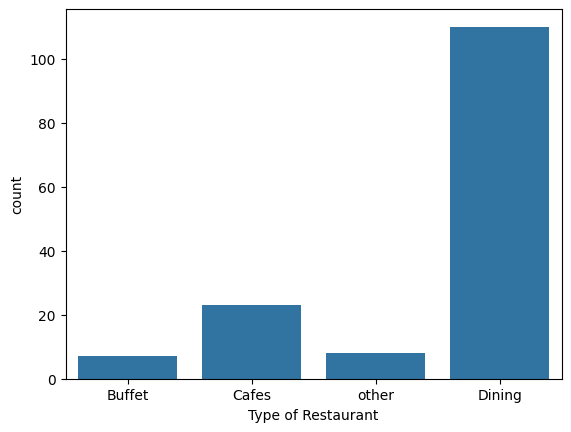

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant') # Corrected function name to 'xlabel'


### Conclusion : The majority of the restaurants fall into the dining category

### Dining restaurants are preffered by a larger number of individuals

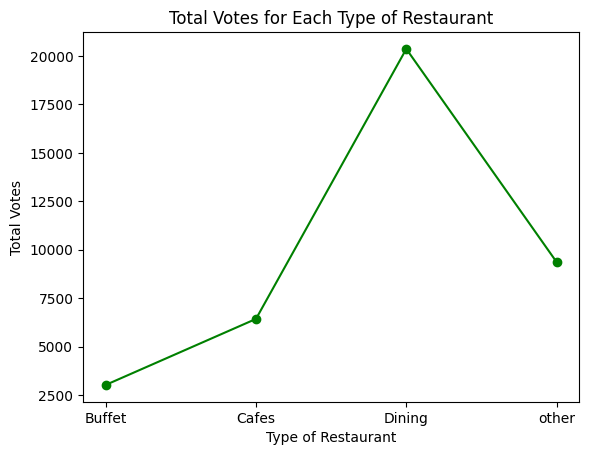

In [11]:
import pandas as pd  # Import pandas
import matplotlib.pyplot as plt

grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})  # Use pd.DataFrame to create a DataFrame
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurant')
plt.ylabel('Total Votes')
plt.title('Total Votes for Each Type of Restaurant')
plt.show()  # Add plt.show() to display the plot

## The majority of restaurants recieved ratings

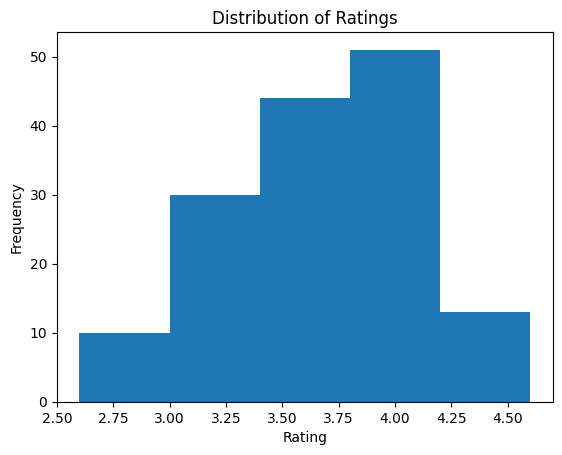

In [13]:
plt.hist(df['rate'],bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

### conclusion: The majority restaurants recieved ratingd ranging 3.5-4

## The majority of couples prefer restaurants with an approximately cost of 300 rupees

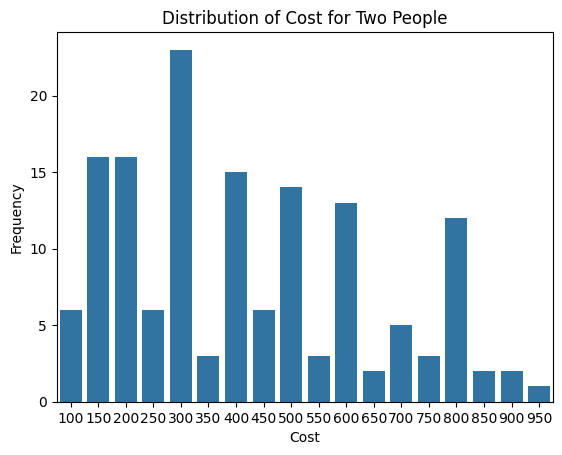

In [14]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Cost for Two People')
plt.show()
#

## Whether online orders recieve higher ratings than offline orders

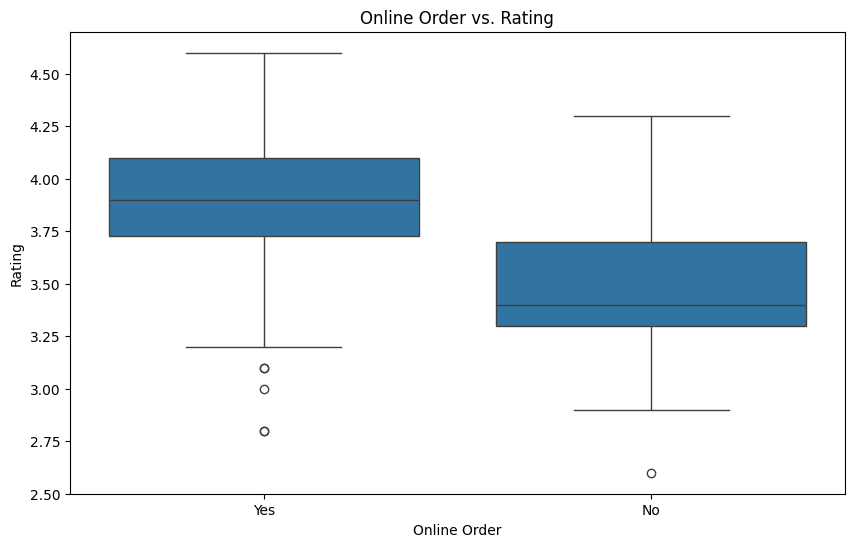

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.title('Online Order vs. Rating')
plt.show()

### conclusion: Offline orders recieved lower ratings in comparision to online orders, which obtained excellent ratings

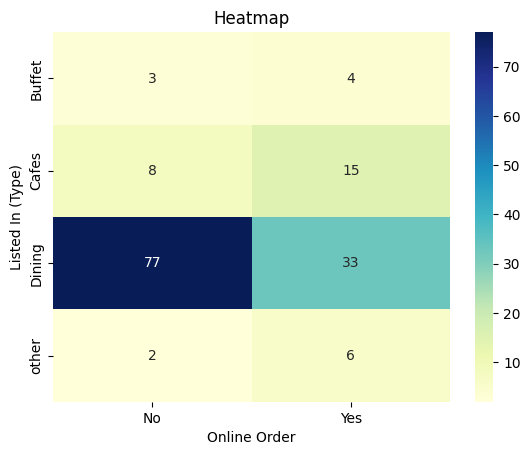

In [18]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', values='name', aggfunc='count')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")

plt.ylabel("Listed In (Type)")

plt.show()

# conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.